In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/reg02-poblacion/REG02_poblacion.csv',sep=';')
df

,UPM,NVIVI,NHOGA,L02,ANIO,AREA,DPTOV,ESTGEO,P102,P104,...,E408H,E408I,E408J,E408K,E408L,E408T,A404,A405,anio_estudio,FEX
0,28211,4,1,1,2021,1,15,2,1,1,...,0,0,0,0,0,2500000,7,2,12,770
1,28211,4,1,2,2021,1,15,2,2,6,...,0,0,0,0,0,0,,,6,770
2,28211,4,1,3,2021,1,15,2,3,1,...,0,0,0,0,0,2500000,8,2,12,770
3,28211,4,1,4,2021,1,15,2,3,1,...,,,,,,,,,0,770
4,28211,4,1,5,2021,1,15,2,3,6,...,0,0,0,0,0,2500000,4,5,12,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,28670,10,1,2,2021,6,15,3,2,6,...,0,0,0,0,0,2100000,6,1,5,218
12739,28670,11,1,1,2021,6,15,3,1,1,...,0,0,0,0,0,1000000,6,1,8,364
12740,28670,11,1,2,2021,6,15,3,2,6,...,0,0,0,0,0,1000000,6,1,0,364
12741,28670,12,1,1,2021,6,15,3,1,1,...,0,0,0,0,0,15000000,7,7,9,282


In [3]:
codigos1=df.P102.unique()

codigos=['Jefe/a','Esposa/o','Hijo/a','Hijastro/a','Nieto/a','Yerno/Nuera','Padre/Madre','Suegro/a','Otro pariente','No pariente',
         'Personal doméstico','Familiar del personal doméstico']

cod_dicc={}
for i,p in zip(codigos1,codigos):
#     cod_dicc.update({i:p})
    cod_dicc[i] = p


In [4]:
cod_dicc

{1: 'Jefe/a',
 2: 'Esposa/o',
 3: 'Hijo/a',
 5: 'Hijastro/a',
 8: 'Nieto/a',
 9: 'Yerno/Nuera',
 7: 'Padre/Madre',
 6: 'Suegro/a',
 4: 'Otro pariente',
 10: 'No pariente',
 11: 'Personal doméstico',
 12: 'Familiar del personal doméstico'}

In [5]:
cod_encuestado_cantidad=df.P102.value_counts().sort_values()
cod_encuestado_cantidad=dict(cod_encuestado_cantidad)
cod_encuestado_cantidad

{12: 2,
 11: 28,
 8: 50,
 10: 69,
 7: 119,
 4: 142,
 6: 231,
 9: 375,
 5: 1043,
 2: 2323,
 1: 3276,
 3: 5085}

In [6]:
etiquetas = [cod_dicc[key] for key in sorted(cod_encuestado_cantidad.keys())]
etiquetas

['Jefe/a',
 'Esposa/o',
 'Hijo/a',
 'Otro pariente',
 'Hijastro/a',
 'Suegro/a',
 'Padre/Madre',
 'Nieto/a',
 'Yerno/Nuera',
 'No pariente',
 'Personal doméstico',
 'Familiar del personal doméstico']

In [7]:
cod_encuestado_cantidad[5]

1043

In [8]:
valores = [cod_encuestado_cantidad[key] for key in sorted(cod_encuestado_cantidad.keys())]
valores

[3276, 2323, 5085, 142, 1043, 231, 119, 50, 375, 69, 28, 2]

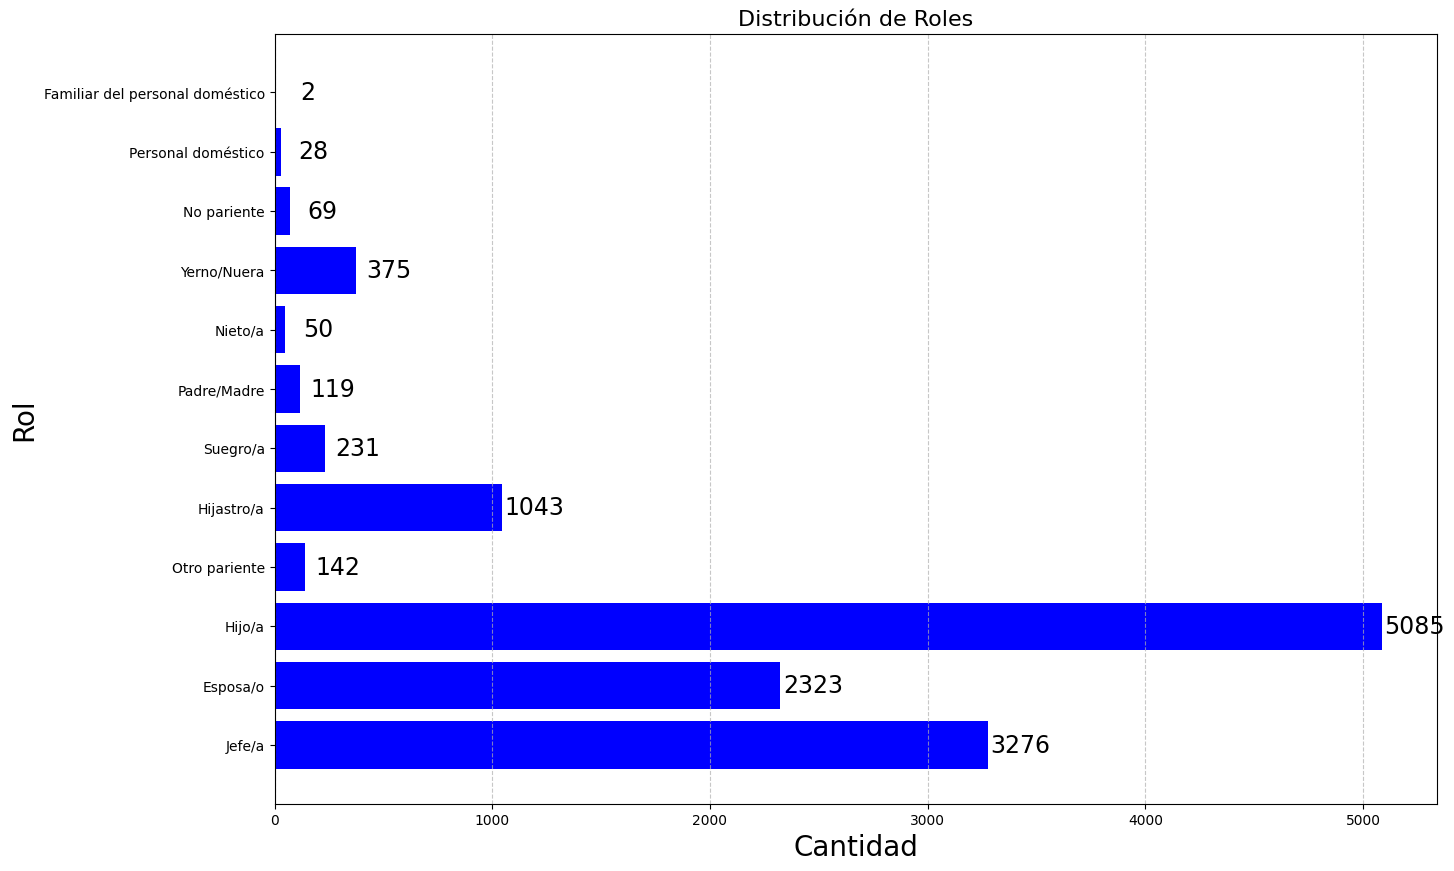

In [9]:
import matplotlib.pyplot as plt

# Extraer las etiquetas y los valores en el orden deseado
etiquetas = [cod_dicc[key] for key in sorted(cod_encuestado_cantidad.keys())]
valores = [cod_encuestado_cantidad[key] for key in sorted(cod_encuestado_cantidad.keys())]

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
bars=plt.barh(etiquetas, valores, color='blue')
plt.xlabel('Cantidad',fontsize=20)
plt.ylabel('Rol',fontsize=20)
plt.title('Distribución de Roles',fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas con los valores en cada barra
for bar, valor in zip(bars, valores):
    plt.text(bar.get_width() + 150, bar.get_y() + bar.get_height()/2,
             valor, ha='center', va='center', color='black',fontsize=17)


# Mostrar el gráfico
plt.show()



In [10]:
# IDENTIFICACION SI ES HOMBRE O MUJER

df.P104.value_counts()

P104
6    6656
1    6087
Name: count, dtype: int64

In [11]:
# Edad de las personas
edad_personas=dict(df.P105.value_counts().sort_values())
edad_personas=dict(sorted(edad_personas.items()))
# edad_personas={k:edad_personas[k] for k in sorted(edad_personas.keys())}
edad_personas

{0: 195,
 1: 202,
 2: 225,
 3: 253,
 4: 224,
 5: 242,
 6: 275,
 7: 258,
 8: 247,
 9: 269,
 10: 243,
 11: 224,
 12: 252,
 13: 248,
 14: 234,
 15: 233,
 16: 222,
 17: 255,
 18: 237,
 19: 192,
 20: 173,
 21: 197,
 22: 203,
 23: 185,
 24: 223,
 25: 204,
 26: 191,
 27: 206,
 28: 189,
 29: 208,
 30: 207,
 31: 185,
 32: 205,
 33: 194,
 34: 181,
 35: 175,
 36: 175,
 37: 163,
 38: 219,
 39: 190,
 40: 195,
 41: 162,
 42: 156,
 43: 138,
 44: 129,
 45: 124,
 46: 117,
 47: 104,
 48: 121,
 49: 151,
 50: 132,
 51: 130,
 52: 108,
 53: 125,
 54: 114,
 55: 112,
 56: 111,
 57: 112,
 58: 106,
 59: 89,
 60: 112,
 61: 104,
 62: 99,
 63: 100,
 64: 100,
 65: 123,
 66: 93,
 67: 87,
 68: 72,
 69: 61,
 70: 71,
 71: 53,
 72: 63,
 73: 53,
 74: 56,
 75: 36,
 76: 37,
 77: 30,
 78: 35,
 79: 30,
 80: 25,
 81: 24,
 82: 20,
 83: 27,
 84: 15,
 85: 11,
 86: 8,
 87: 8,
 88: 9,
 89: 14,
 90: 9,
 91: 2,
 92: 2,
 93: 4,
 94: 3,
 95: 5,
 96: 1,
 97: 1,
 98: 1}

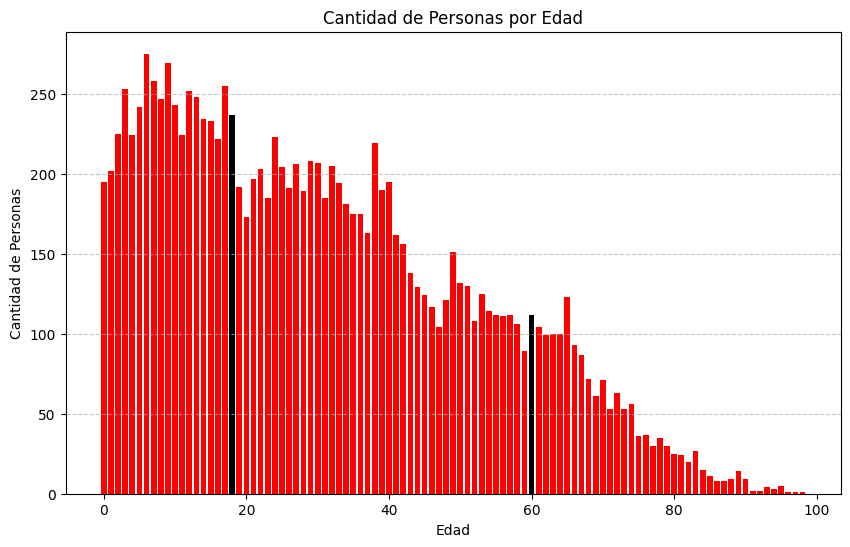

In [12]:
import matplotlib.pyplot as plt

# Obtener las edades y las cantidades como listas separadas
edades = list(edad_personas.keys())
cantidades = list(edad_personas.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(edades, cantidades, color='red')
plt.bar(18, 237, color='black')
plt.bar(60, 112, color='black')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.title('Cantidad de Personas por Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [13]:
# ¿Cuál es la última etapa, grado, ciclo o semestre más alto aprobado por ?

codigo_escuela=dict(df.ED304.value_counts())
codigo_escuela=dict(sorted(codigo_escuela.items()))
escala_escuela=['Ninguno','Primero','Segundo','Tercero','Cuarto','Quinto','Sexto','Séptimo','Octavo','Noveno','Pre-jardín','Jardín','Preescolar','NR']
codigo_escuela

{0: 1603,
 1: 979,
 2: 1174,
 3: 2918,
 4: 963,
 5: 1050,
 6: 1945,
 7: 465,
 8: 449,
 9: 727,
 10: 19,
 11: 164,
 12: 238,
 99: 49}

In [14]:
# ¿Cuál es la última etapa, grado, ciclo o semestre más alto aprobado por ?
cod_educacion={}
for i,p in zip(codigo_escuela.values(),escala_escuela):
#     cod_dicc.update({i:p})
    cod_educacion[i] = p
    
cod_educacion

{1603: 'Ninguno',
 979: 'Primero',
 1174: 'Segundo',
 2918: 'Tercero',
 963: 'Cuarto',
 1050: 'Quinto',
 1945: 'Sexto',
 465: 'Séptimo',
 449: 'Octavo',
 727: 'Noveno',
 19: 'Pre-jardín',
 164: 'Jardín',
 238: 'Preescolar',
 49: 'NR'}

In [15]:
# ¿Cuál es la última etapa, grado, ciclo o semestre más alto aprobado por ?
educacion=list(cod_educacion.values())
cant_educacion=list(cod_educacion.keys())

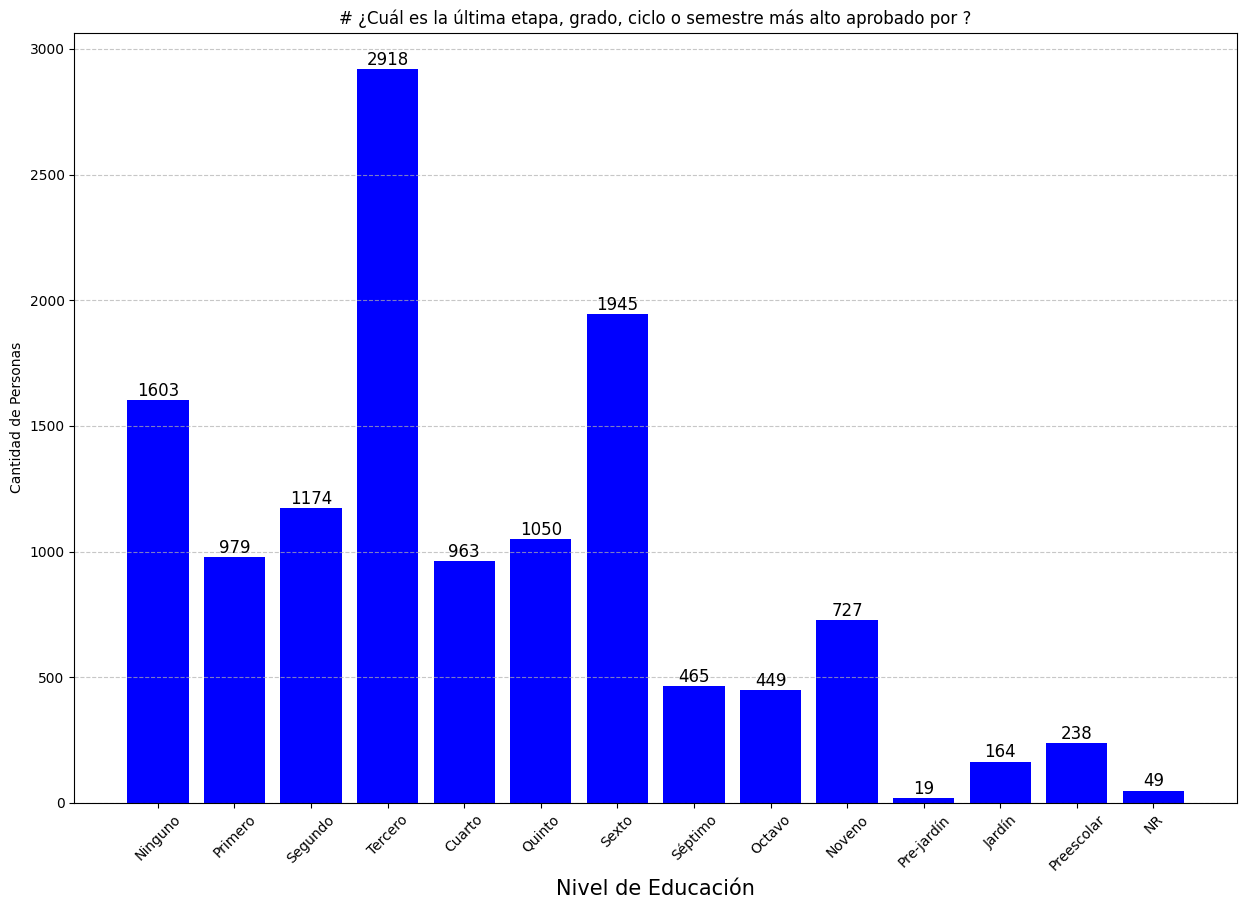

In [16]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
bar1=plt.bar(educacion,cant_educacion,color='blue')
plt.xlabel('Nivel de Educación',fontsize=15)
plt.ylabel('Cantidad de Personas')
plt.title('# ¿Cuál es la última etapa, grado, ciclo o semestre más alto aprobado por ?')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
# Agregar etiquetas con los valores en cada barra
for bar, valor in zip(bar1, cant_educacion):
    plt.text(bar.get_x()+ bar.get_width()/2,bar.get_height()+0.5,
             valor, ha='center', va='bottom', color='black',fontsize=12)
# Mostrar el gráfico
plt.show()


In [17]:
#  ¿A qué nivel corresponde la última etapa, grado, curso, ciclo o semestre más alto que aprobó ?

codigo_instruccion=dict(df.ED305.value_counts().sort_values())
codigo_instruccion[10]=0
codigo_instruccion[12]=0
codigo_instruccion=dict(sorted(codigo_instruccion.items()))
escala_instruccion=['SinInstrucción','Nivel Inicial/Grado y Programas Especiales','Educación Especial','EEB (1° y 2° ciclo)/Ex Primaria','EEB (3° ciclo)/Ex Secundaria Básica',
'Educación media/Ex bachillerato',
'Educ. Media a Distancia/Media Alternativa/Media para Jóvenes y Adultos',
'Educ. Básica Bilingüe para Jóvenes y Adultos',
'Educ. Básica Alternativa para Jóvenes y Adultos',
'Bachillerato a Distancia',
'Formación Profesional no Bachillerato de la  Media',
'Programa de Alfabetización',
'Técnica Superior',
'Formación Docente',
'Profesionalización Docente',
'Formación Militar/Policial',
'Universitario',
'NR']
codigo_instruccion
# len(escala_instruccion)

{1: 1546,
 2: 478,
 3: 13,
 4: 4492,
 5: 1640,
 6: 2611,
 7: 15,
 8: 5,
 9: 3,
 10: 0,
 11: 2,
 12: 0,
 13: 96,
 14: 190,
 15: 38,
 16: 54,
 17: 1511,
 99: 49}

In [18]:
#  ¿A qué nivel corresponde la última etapa, grado, curso, ciclo o semestre más alto que aprobó ?

cod_instruccion={}
for i,p in zip(codigo_instruccion,escala_instruccion):
#     cod_dicc.update({i:p})
    cod_instruccion[i] = p
    
# cod_instruccion=dict(sorted(cod_instruccion.items()))
cod_instruccion

{1: 'SinInstrucción',
 2: 'Nivel Inicial/Grado y Programas Especiales',
 3: 'Educación Especial',
 4: 'EEB (1° y 2° ciclo)/Ex Primaria',
 5: 'EEB (3° ciclo)/Ex Secundaria Básica',
 6: 'Educación media/Ex bachillerato',
 7: 'Educ. Media a Distancia/Media Alternativa/Media para Jóvenes y Adultos',
 8: 'Educ. Básica Bilingüe para Jóvenes y Adultos',
 9: 'Educ. Básica Alternativa para Jóvenes y Adultos',
 10: 'Bachillerato a Distancia',
 11: 'Formación Profesional no Bachillerato de la  Media',
 12: 'Programa de Alfabetización',
 13: 'Técnica Superior',
 14: 'Formación Docente',
 15: 'Profesionalización Docente',
 16: 'Formación Militar/Policial',
 17: 'Universitario',
 99: 'NR'}

In [19]:
#  ¿A qué nivel corresponde la última etapa, grado, curso, ciclo o semestre más alto que aprobó ?

eje_x=list(cod_instruccion.values())
eje_y=list(codigo_instruccion.values())

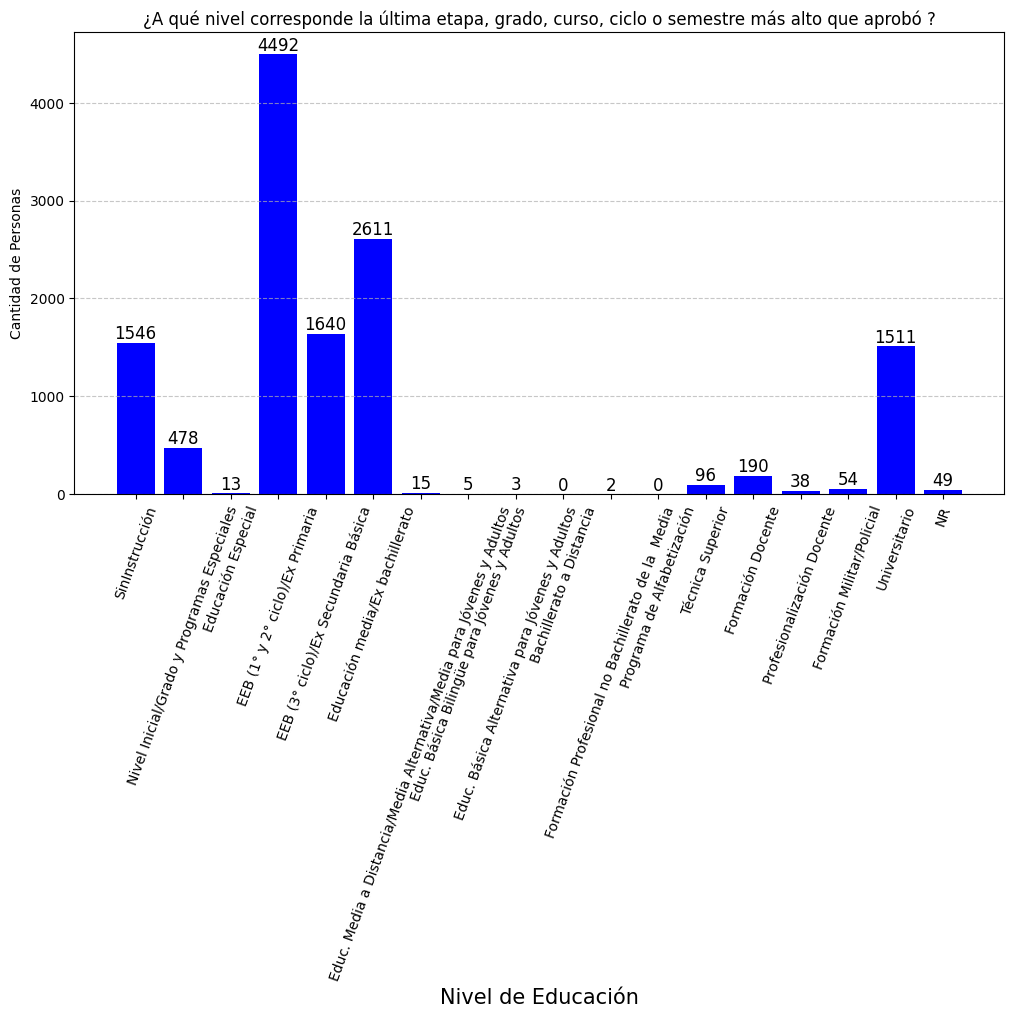

In [20]:
#  ¿A qué nivel corresponde la última etapa, grado, curso, ciclo o semestre más alto que aprobó ?


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar1=plt.bar(eje_x,eje_y,color='blue')
plt.xlabel('Nivel de Educación',fontsize=15)
plt.ylabel('Cantidad de Personas')
plt.title('¿A qué nivel corresponde la última etapa, grado, curso, ciclo o semestre más alto que aprobó ?')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=70)
# Agregar etiquetas con los valores en cada barra
for bar, valor in zip(bar1, codigo_instruccion.values()):
    plt.text(bar.get_x()+ bar.get_width()/2,bar.get_height()+0.5,
             valor, ha='center', va='bottom', color='black',fontsize=12)


# Mostrar el gráfico
plt.show()

**REG06A_ÁMBITO PÚBLICO FAMILIAR**  

In [21]:
reg06a=pd.read_csv('/kaggle/input/ambito-publico-familiar/REG06A_Ambito Publico Familiar.csv',sep=';')
reg06a

,UPM,NVIVI,NHOGA,ANIO,AREA,DPTOV,ESTGEO,LS06A,P601A,P602E,...,P605_E,P605_L,P605_C,P606_E,P606_L,P606_C,P607_E,P607_L,P607_C,FEX_MUJER
0,19,4,1,2021,1,0,1,1,6,,...,,,,,,,,,,459
1,19,4,1,2021,1,0,1,3,6,,...,,,,,,,,,,459
2,19,4,1,2021,1,0,1,4,6,,...,,,,,,,,,,459
3,19,4,1,2021,1,0,1,5,6,,...,,,,,,,,,,459
4,19,4,1,2021,1,0,1,6,6,,...,,,,,,,,,,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68791,28670,12,1,2021,6,15,3,18,6,,...,,,,,,,,,,210
68792,28670,12,1,2021,6,15,3,19,6,,...,,,,,,,,,,210
68793,28670,12,1,2021,6,15,3,20,6,,...,,,,,,,,,,210
68794,28670,12,1,2021,6,15,3,21,6,,...,,,,,,,,,,210


**Durante toda su vida de estudiante, su vida laboral y/o en su vida comunitaria. ¿A usted…**

* la han ignorado o no la han tomado en cuenta por ser mujer?
* le han impedido su participación o limitado su opinión en el ámbito político, comunitario, gremial, comite vecinal, escolar o en los ámbitos en que usted se desenvuelve?
* le han dicho piropos o frases de carácter sexual que le molestaron u ofendieron?
* le han enviado mensajes o publicado comentarios con insinuaciones sexuales,insultos u ofensas, a través del celular, correo electrónico redes sociales como Facebook, WhatsApp o Instagram?
* la han humillado, discriminado, calumniado o le han hecho sentir mal frente a otras personas?
* la han tocado, besado, manoseado o se le han arrimado, encimado o recostado sin su consentimiento?
* le han hecho sentir miedo de ser atacada o abusada sexualmente?
* la han obligado a ver escenas o actos sexuales o pornográficos como fotos, revistas o videos?
* la han obligado a desvestirse , mostrar sus partes íntimas o alguna persona le mostró sus partes íntimas o se las manoseó frente a usted?
* la han castigado o han tomado represalias por haberse negado a propuestas de índole sexual?
* la han seguido al salir de la institución educativa, del trabajo o en la comunidad?
* la han cambiado de turno o de uniforme; o la han expulsado por haber quedado embarazada en alguna institución educativa?
* le han hecho propuestas o insinuaciones para tener relaciones sexuales a cambio de algo como calificaciones, cosas o beneficios en la institución educativa?
* le han hecho o solicitado una prueba de embarazo para acceder a un puesto de trabajo y/o prueba de VIH-SIDA?
* la han despedido, no le han renovado el contrato o le han bajado el sueldo debido a un embarazo ?
* la han trasladado, cambiado de puesto o de turno en el trabajo por haber quedado embarazada?
* le han negado o le han disminuido el tiempo de permiso de maternidad o lactancia?
* le han hecho propuestas o insinuaciones para tener relaciones sexuales a cambio de algo como ascenso o aumento de sueldo?
* le han hecho propuestas o insinuaciones para tener relaciones sexuales a cambio de algo en su comunidad?
* la han forzado u obligado a tener relaciones sexuales?
* le han estirado del cabello, abofeteado, empujado, lanzado algún objeto, golpeado con el puño o pateado?
* la han agredido con armas de fuegos, armas blancas como machetes o cuchillos o con sustancias químicas?
* Otros

In [22]:
# Durante toda su vida de estudiante, su vida laboral y/o en su vida comunitaria.
#¿A usted le ha sucedido algo de lo que está escrito en el parrafo de arriba ??

ofensa=dict(reg06a.P601A.value_counts())
ofensa=dict(sorted(ofensa.items()))
ofensa
escala_ofensa={1:'Si',6:'No',9:'NR'}

dicc_escala_ofensa=dict()
for i,p in zip(escala_ofensa.values(),ofensa.values()):
    dicc_escala_ofensa[i]=p
dicc_escala_ofensa

{'Si': 6428, 'No': 62355, 'NR': 13}

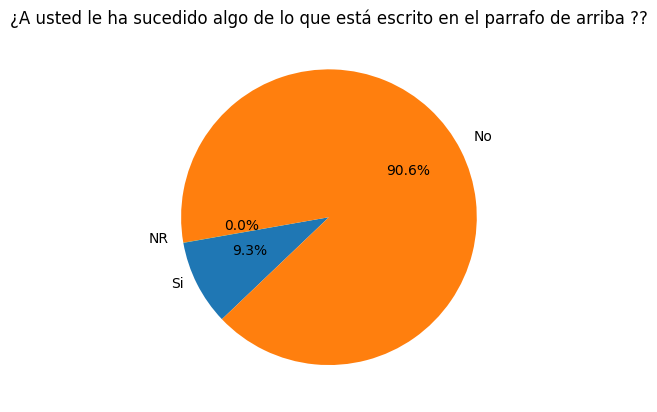

In [23]:
# Extraemos las etiquetas y los valores del diccionario
labels1 = dicc_escala_ofensa.keys()
values1 = dicc_escala_ofensa.values()
# plt.figure(figsize=(15,8))
# Creamos el gráfico de torta
plt.pie(values1,labels=labels1, autopct='%1.1f%%',startangle=190,textprops={'fontsize': 10, 'verticalalignment': 'bottom'})
# Crea la leyenda en un cuadro al lado del gráfico
# plt.legend(labels1, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Añadimos un título
plt.title('¿A usted le ha sucedido algo de lo que está escrito en el parrafo de arriba ??')

# Mostramos el gráfico
plt.show()

In [24]:
# Los hechos ocurrieron en el lugar de estudio???.
estudio_escala={1:'Si',6:'No',8:'NO APLICA',9:'NR'}
estudio=reg06a.P602E.dropna()
estudio=estudio.value_counts()
estudio=dict(sorted(estudio.items()))
estudio.pop(' ')
estudio

diccionario_estudio=dict()

for i,p in zip(estudio_escala.values(),estudio.values()):
    diccionario_estudio[i]=p
    
diccionario_estudio

{'Si': 919, 'No': 4822, 'NO APLICA': 687, 'NR': 13}

**...lugar de trabajo?**

In [25]:
trabajo_escala={1:'Si',6:'No',8:'NO APLICA',9:'NR'}
trabajo=reg06a.P602L.dropna()
trabajo=trabajo.value_counts()
trabajo=dict(sorted(trabajo.items()))
trabajo.pop(' ')
trabajo

diccionario_trabajo=dict()

for i,p in zip(trabajo_escala.values(),trabajo.values()):
    diccionario_trabajo[i]=p
    
diccionario_trabajo

{'Si': 1374, 'No': 4259, 'NO APLICA': 795, 'NR': 13}

**...comunidad ??**

In [26]:
comunidad_escala={1:'Si',6:'No',8:'NO APLICA',9:'NR'}
comunidad=reg06a.P602C.dropna()
comunidad=comunidad.value_counts()
comunidad=dict(sorted(trabajo.items()))
# comunidad.pop(' ')
comunidad

diccionario_comunidad=dict()

for i,p in zip(comunidad_escala.values(),comunidad.values()):
    diccionario_comunidad[i]=p
    
diccionario_comunidad

{'Si': 1374, 'No': 4259, 'NO APLICA': 795, 'NR': 13}

In [27]:
# Principalmente de quien recibió este trato ...???
dequien_escala={1:'Del profesor(a) o maestro(a)',2:'De un compañero(a) de estudios',3:'Del director(a) o autoridad',
                4:'De un trabajador(a) administrativo(a)',
                5:'Del conductor(a) del transporte escolar',
                6:'De una persona desconocida en el centro educativo',
                7:'De otra persona',
                8:'NR'}

dequien=reg06a.P603E.value_counts()
dequien=dict(sorted(dequien.items()))
dequien.pop(' ')
dequien

{'1': 175, '2': 616, '3': 30, '4': 3, '5': 1, '6': 71, '96': 23, '99': 14}

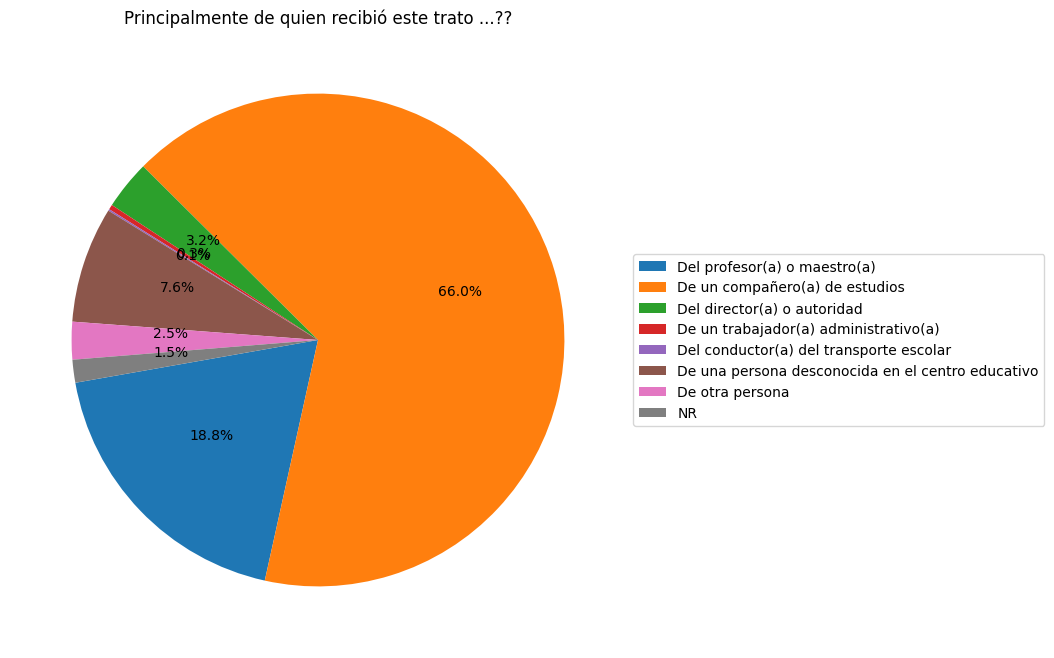

In [28]:
dicc_dequien=dict()
for i,p in zip(dequien_escala.values(),dequien.values()):
    dicc_dequien[i]=p
    
dicc_dequien

# Extraemos las etiquetas y los valores del diccionario
labels = dicc_dequien.keys()
values = dicc_dequien.values()
plt.figure(figsize=(15,8))
# Creamos el gráfico de torta
plt.pie(values, autopct='%1.1f%%',startangle=190,textprops={'fontsize': 10, 'verticalalignment': 'bottom'})
# Crea la leyenda en un cuadro al lado del gráfico
plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Añadimos un título
plt.title('Principalmente de quien recibió este trato ...??')

# Mostramos el gráfico
plt.show()

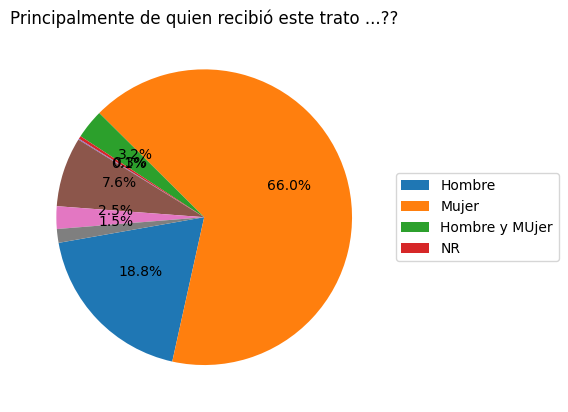

In [29]:
# De que sexo ...???
sexo_escala={1:'Hombre',
                6:'Mujer',
                8:'Hombre y MUjer',
                9:'NR'}

sexo=reg06a.P603ES.value_counts()
sexo=dict(sorted(sexo.items()))
sexo.pop(' ')

dicc_sexo=dict()
for i,p in zip(sexo_escala.values(),sexo.values()):
    dicc_sexo[i]=p
    
# Extraemos las etiquetas y los valores del diccionario
labels2 = dicc_sexo.keys()
values2 = dicc_sexo.values()
# plt.figure(figsize=(15,8))
# Creamos el gráfico de torta
plt.pie(values, autopct='%1.1f%%',startangle=190,textprops={'fontsize': 10, 'verticalalignment': 'bottom'})
# Crea la leyenda en un cuadro al lado del gráfico
plt.legend(labels2, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Añadimos un título
plt.title('Principalmente de quien recibió este trato ...??')
plt.show()

In [30]:
reg09=pd.read_csv('/kaggle/input/vida-en-pareja/REG09A_Vida en pareja.csv',sep=';')
first=dict(reg09.P922.value_counts())
first.pop(' ')
first=dict(sorted(first.items()))
edad=list(first.keys())
cantidad=list(first.values())
# first

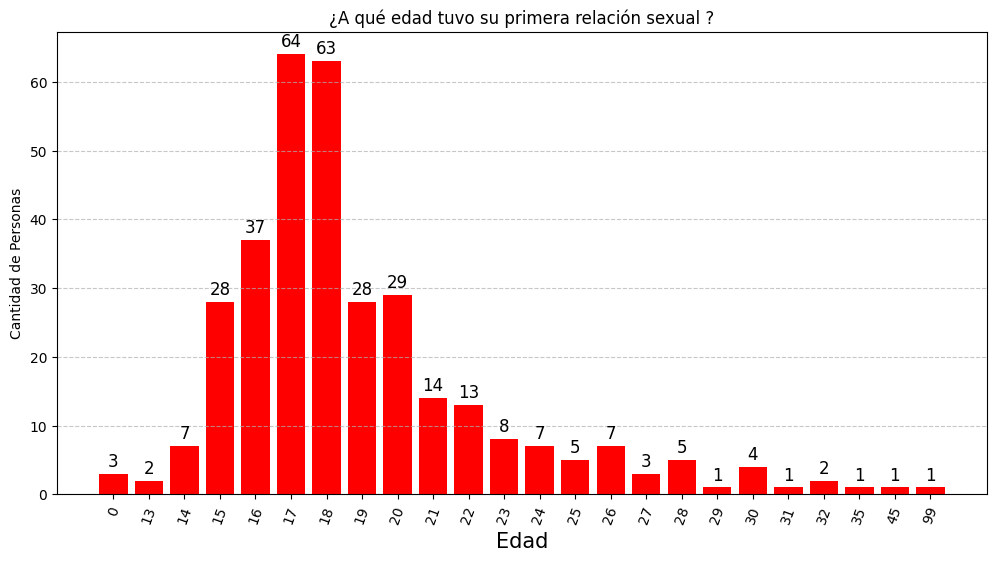

In [31]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar1=plt.bar(edad,cantidad,color='red')
plt.xlabel('Edad',fontsize=15)
plt.ylabel('Cantidad de Personas')
plt.title('¿A qué edad tuvo su primera relación sexual ?')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=70)
# Agregar etiquetas con los valores en cada barra
for bar, valor in zip(bar1, cantidad):
    plt.text(bar.get_x()+ bar.get_width()/2,bar.get_height()+0.5,
             valor, ha='center', va='bottom', color='black',fontsize=12)
# Mostrar el gráfico
plt.show()

In [32]:
def graficador(df,num_col,pregunta):
    import pandas as pd
    first=dict(df[num_col].value_counts())
    first.pop(' ')
    first=dict(sorted(first.items()))
    edad=list(first.keys())
    cantidad=list(first.values())
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 6))
    bar1=plt.bar(edad,cantidad,color='red')
    plt.xlabel('Edad',fontsize=15)
    plt.ylabel('Cantidad de Personas')
    plt.title(pregunta)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=70)
    plt.legend(edad, loc='center left', bbox_to_anchor=(1.0, 0.5))
    # Agregar etiquetas con los valores en cada barra
    for bar, valor in zip(bar1, cantidad):
        plt.text(bar.get_x()+ bar.get_width()/2,bar.get_height()+0.5,
                 valor, ha='center', va='bottom', color='black',fontsize=12)
    # Mostrar el gráfico
    plt.show()

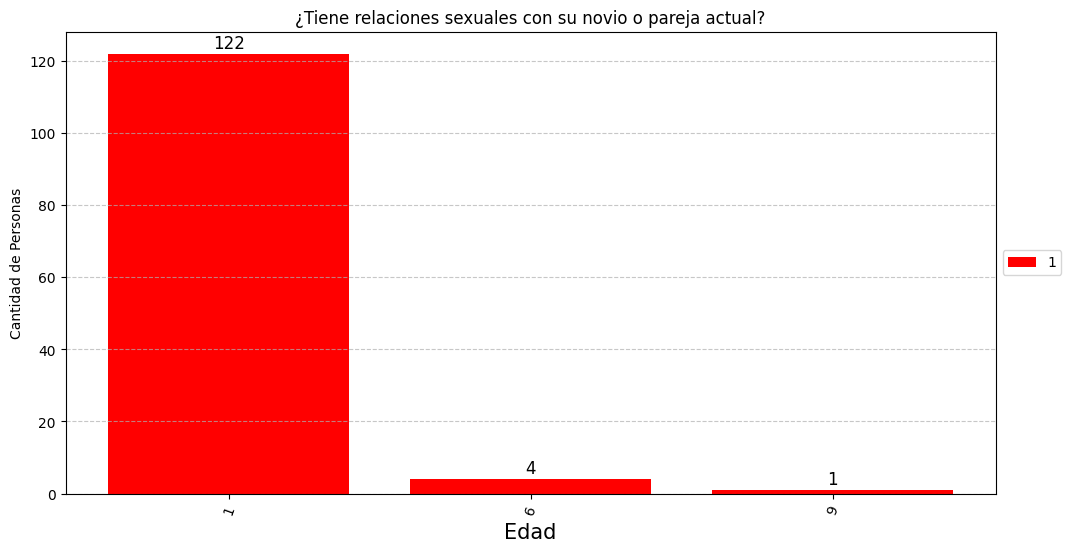

In [33]:
 reg09=pd.read_csv('/kaggle/input/vida-en-pareja/REG09A_Vida en pareja.csv',sep=';')
graficador(reg09,'P924','¿Tiene relaciones sexuales con su novio o pareja actual?')

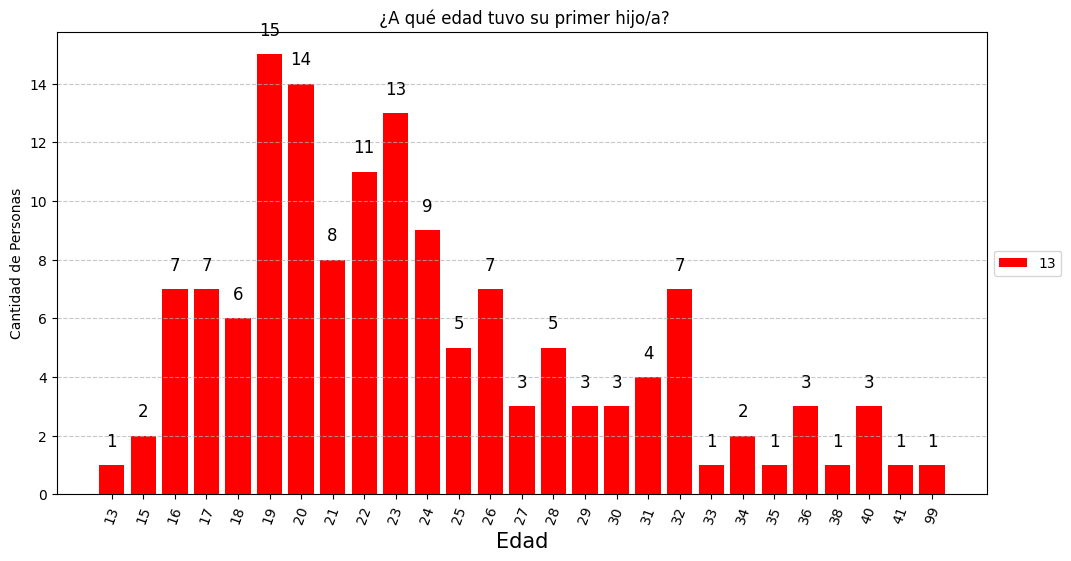

In [34]:
graficador(reg09,'P926',' ¿A qué edad tuvo su primer hijo/a?')

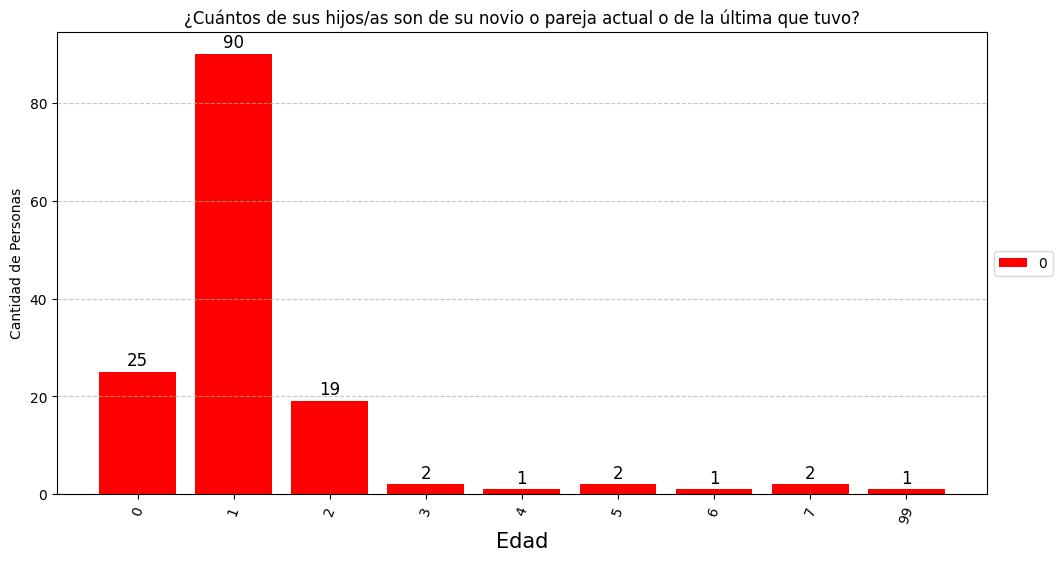

In [35]:
graficador(reg09,'P928','¿Cuántos de sus hijos/as son de su novio o pareja actual o de la última que tuvo?')

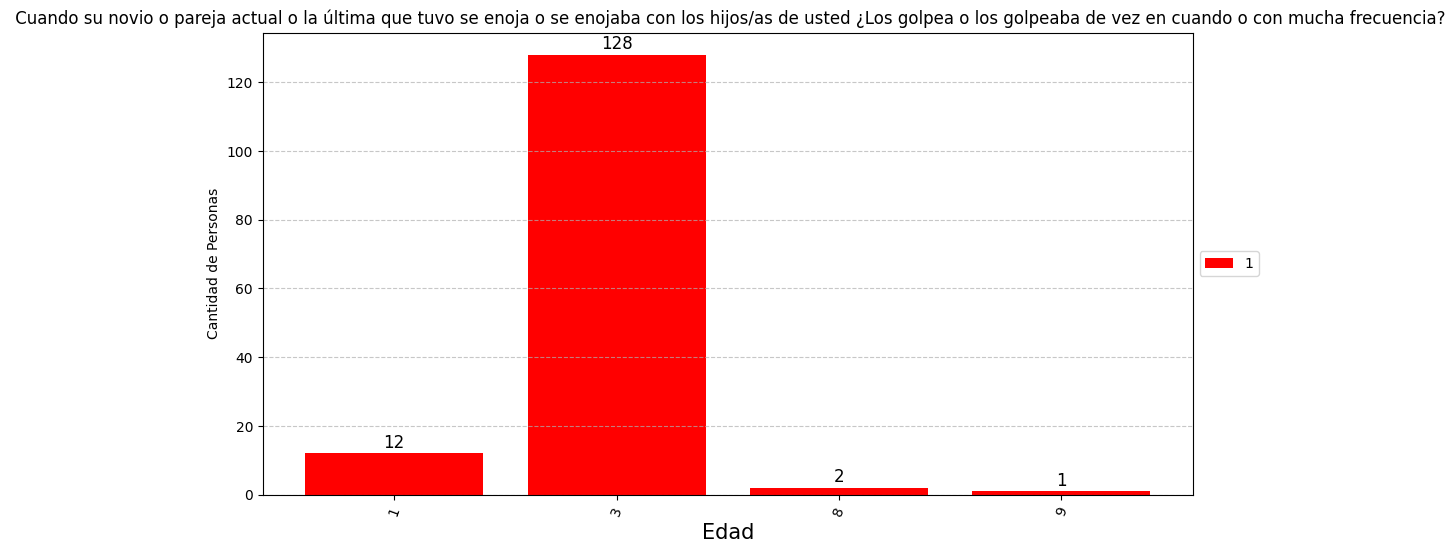

In [36]:
graficador(reg09,'P929',' Cuando su novio o pareja actual o la última que tuvo se enoja o se enojaba con los hijos/as de usted ¿Los golpea o los golpeaba de vez en cuando o con mucha frecuencia?')

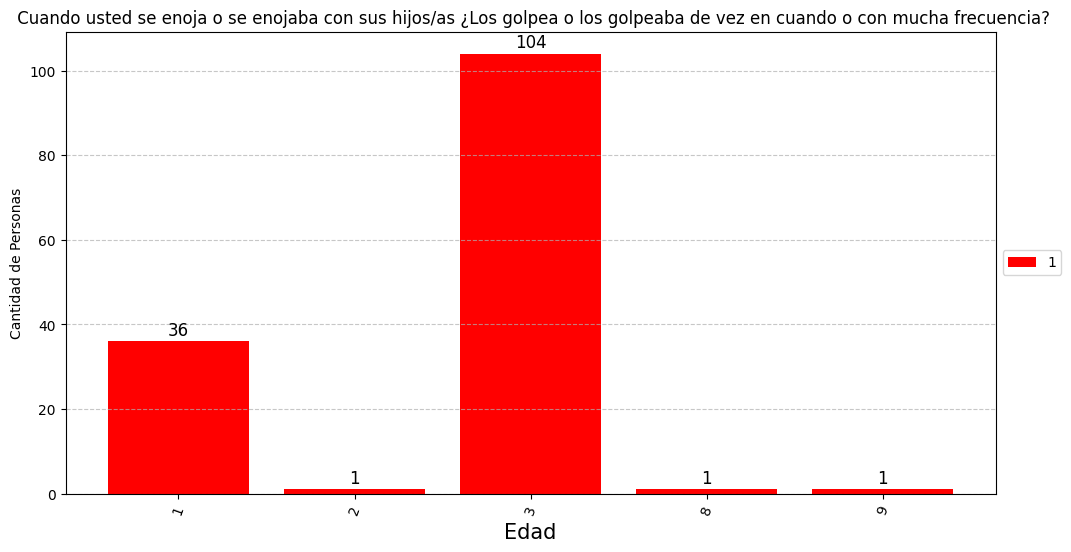

In [37]:
graficador(reg09,'P930',' Cuando usted se enoja o se enojaba con sus hijos/as ¿Los golpea o los golpeaba de vez en cuando o con mucha frecuencia?')

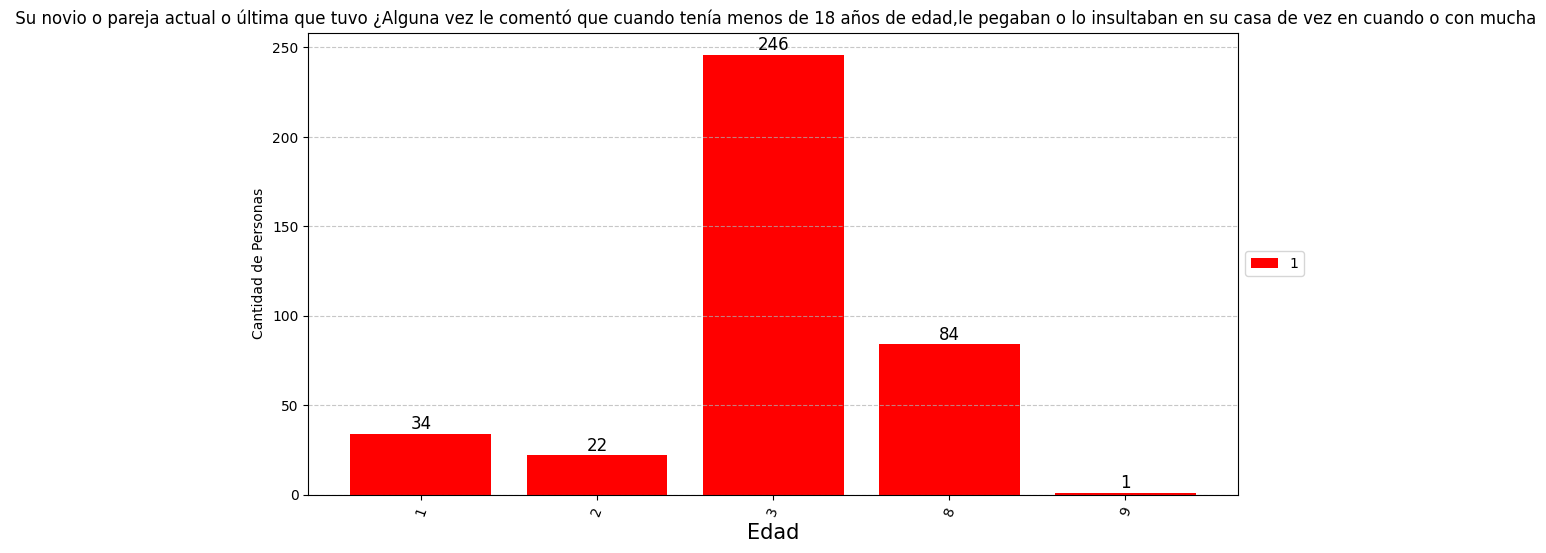

In [38]:
graficador(reg09,'P931',' Su novio o pareja actual o última que tuvo ¿Alguna vez le comentó que cuando tenía menos de 18 años de edad,le pegaban o lo insultaban en su casa de vez en cuando o con mucha')

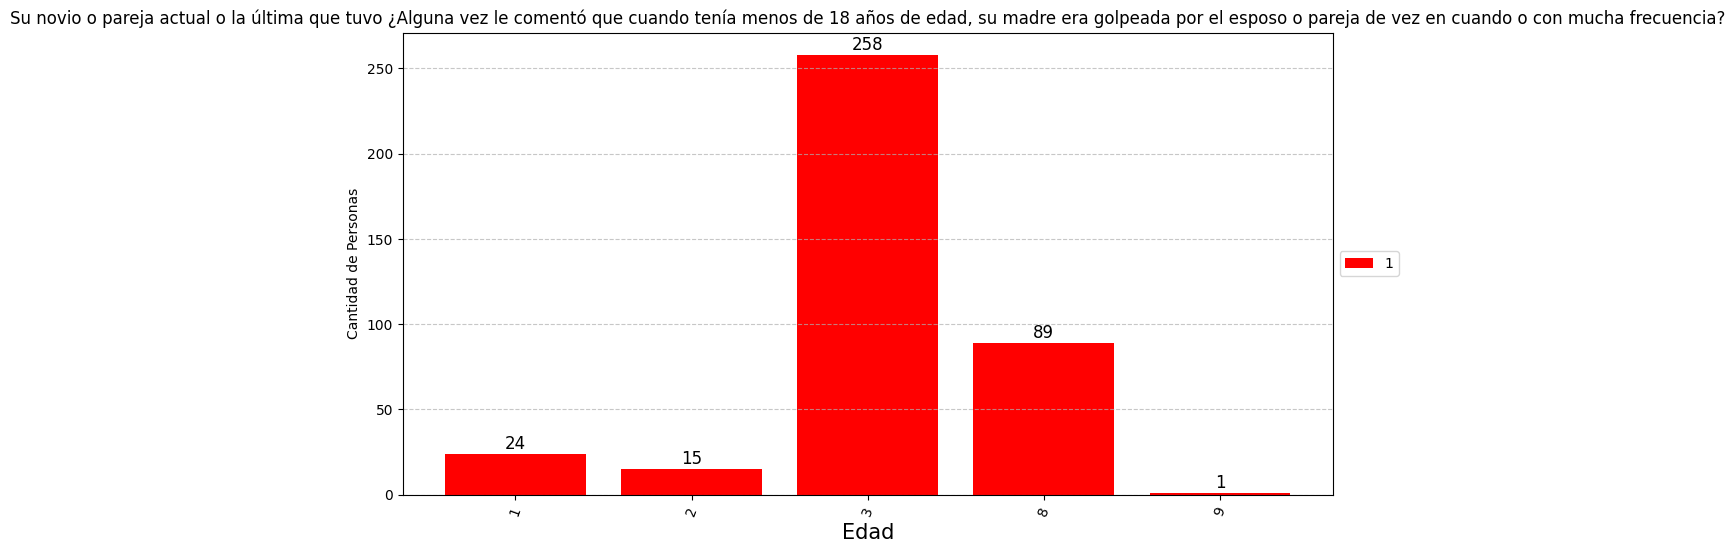

In [39]:
graficador(reg09,'P932','Su novio o pareja actual o la última que tuvo ¿Alguna vez le comentó que cuando tenía menos de 18 años de edad, su madre era golpeada por el esposo o pareja de vez en cuando o con mucha frecuencia?')

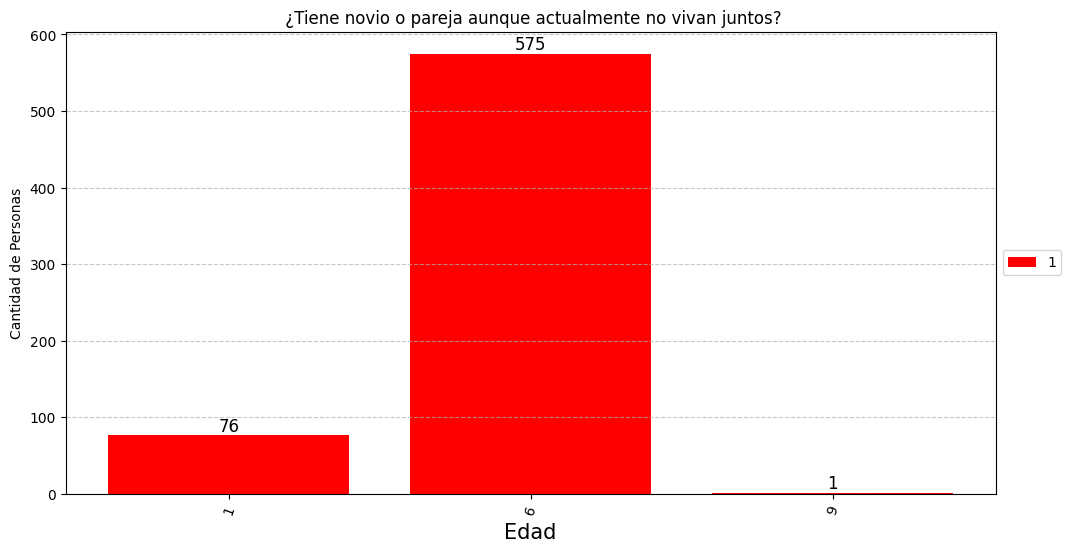

In [40]:
graficador(reg09,'P933',' ¿Tiene novio o pareja aunque actualmente no vivan juntos?')

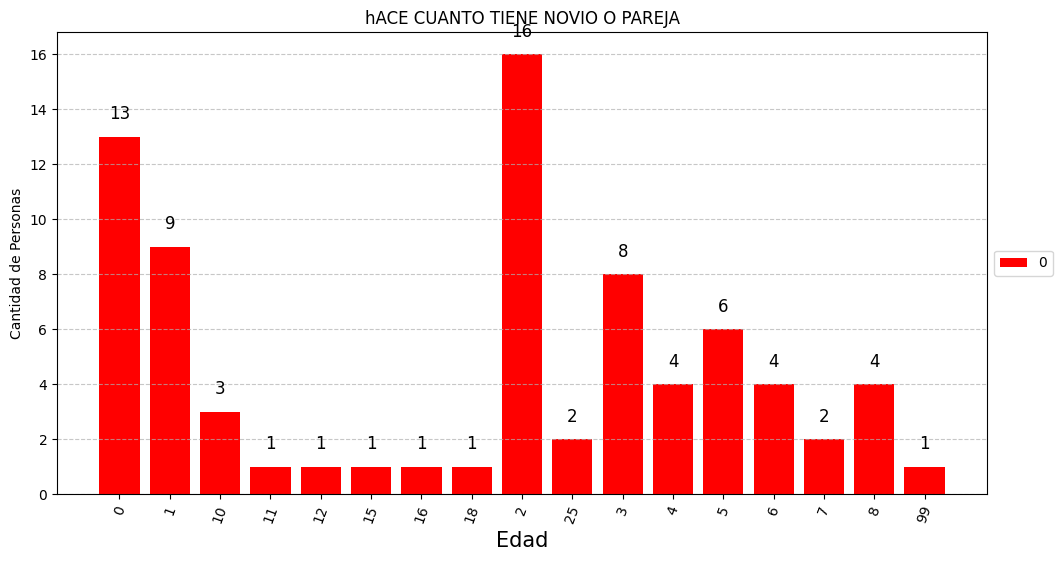

In [41]:
graficador(reg09,'P934','hACE CUANTO TIENE NOVIO O PAREJA')

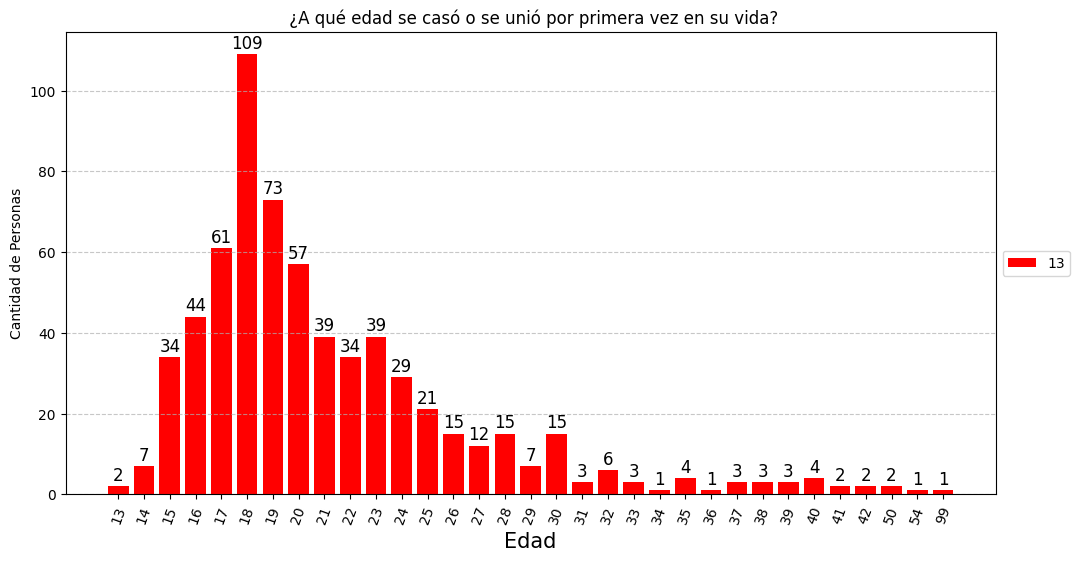

In [42]:
graficador(reg09,'P935',' ¿A qué edad se casó o se unió por primera vez en su vida?')

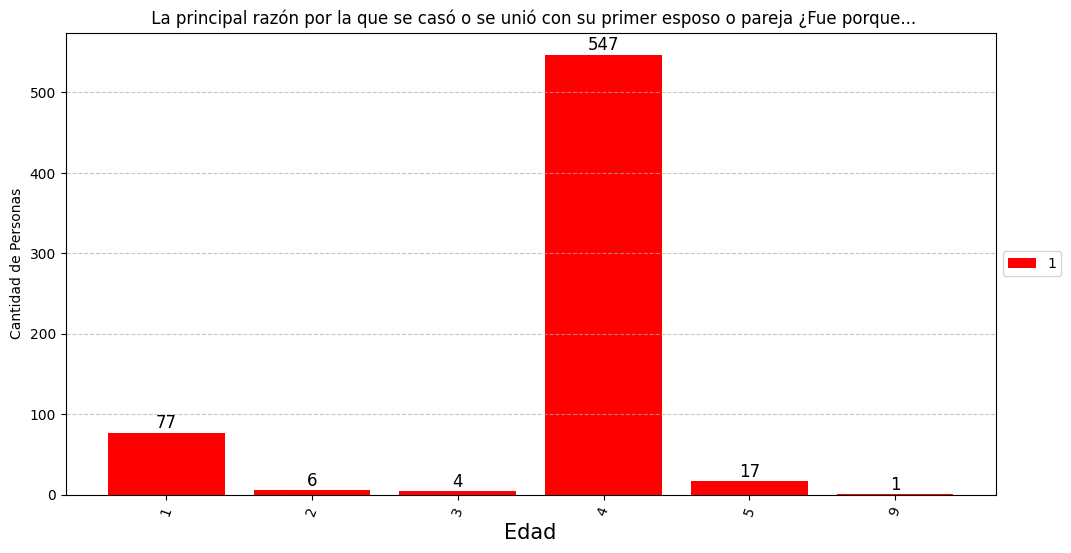

In [43]:
graficador(reg09,'P936',' La principal razón por la que se casó o se unió con su primer esposo o pareja ¿Fue porque...')

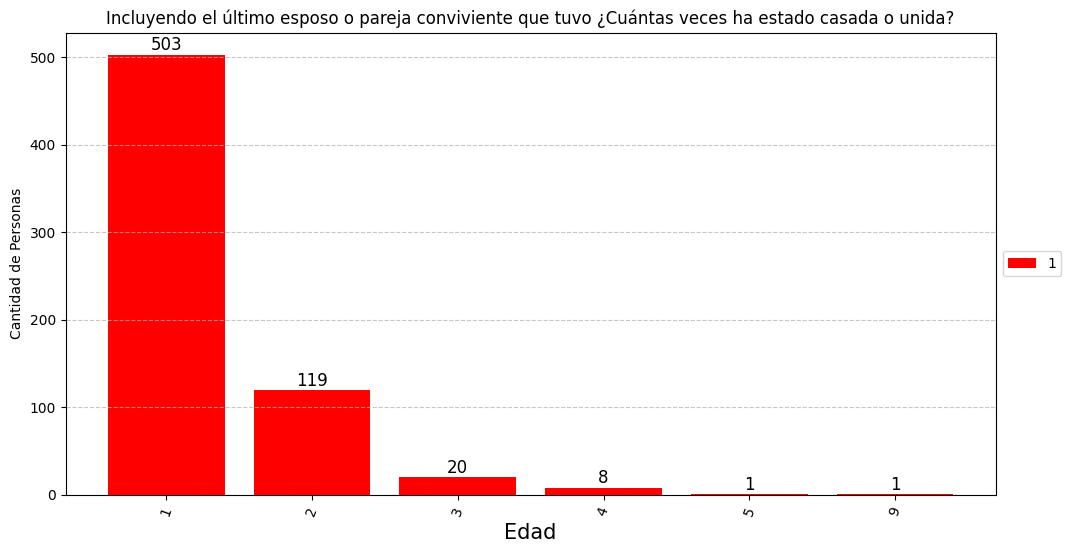

In [44]:
graficador(reg09,'P937','Incluyendo el último esposo o pareja conviviente que tuvo ¿Cuántas veces ha estado casada o unida?')

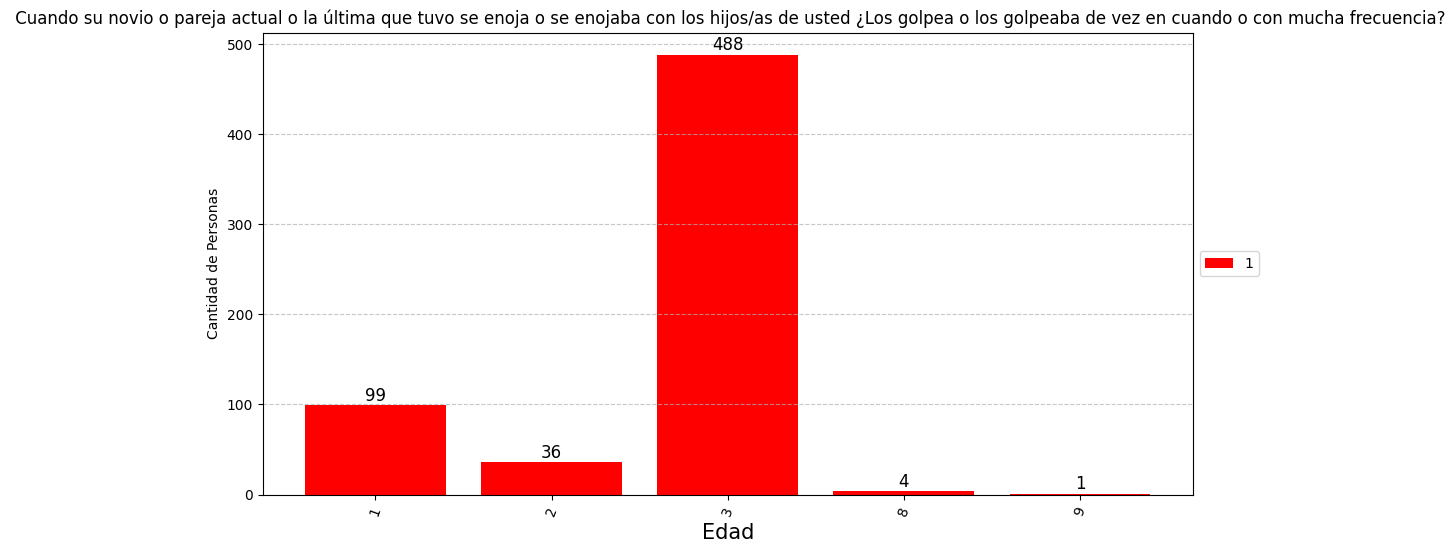

In [45]:
graficador(reg09,'P943',' Cuando su novio o pareja actual o la última que tuvo se enoja o se enojaba con los hijos/as de usted ¿Los golpea o los golpeaba de vez en cuando o con mucha frecuencia?')